## **Assignment #1: EDA & Dataset**




### **Overview**

In this first assignment, you will gain hands-on experience selecting and preparing a dataset, performing exploratory data analysis (EDA), adding it to HF's Datasets, and presenting your findings in a short video.

Through these steps, you’ll begin building essential data science skills in Python.

Think of your notebook as a cohesive story where EDA reveals the narrative of your data, which provides the resolution to the main question or goal.

### **Objectives**

1. Explore various data tools/hubs (e.g., Kaggle, UCI, or local data) to find a suitable dataset.
2. Prepare the selected dataset, focusing on cleaning, transformation, manipulation, and quality.
3. Build foundational EDA skills, including  missing data, outlier handling, and clear data visualization.
4. Upload your work and your dataset to HuggingFace.
5. Communicate findings concisely in both a structured notebook, README file,  and a short video presentation, demonstrating clarity in each step of the workflow.

### **Submission Guidelines**

1. Please note that this is an individual assignment.
2. Submit a text file with your info and the link to HF's dataset.
3. The dataset will include all of your work.
  - **Python Notebook**: a well-structured notebook (e.g.`.ipynb` file) with clear comments or markdown explanations of each step.
  - **Video Link**: the README file will include your short video presentation at the beginning of the file.
4. **Oral Report**: Students may be randomly chosen to present their work in a quick online session with the T.A., typically lasting ±10 minutes.





### **Evaluation Criteria**

- **Organization & Clarity (20%)**: Overall structure of your HF Dataset, code, notebook, clear communication, and a concise summary.
- **Data Handling (30%)**: Quality of data cleaning, appropriate handling of outliers, and more.
- **Visualizations (30%)**: well-presented relevant visuals.
- **Presentation (20%)**: Clearly communicated approach and findings in your 2–3 minute overview.



### **Additional Tips**

- The first thing you should do is download a copy of this notebook to your drive.
- Keep your dataset size manageable. If the dataset is large, you can sample a subset.
- A few clear visuals are more effective than many complicated ones.
- Ask for help or feedback early if you get stuck.

<br><br><br>

---

Reminder: Always start with copy the NOTEBOOK to your drive.

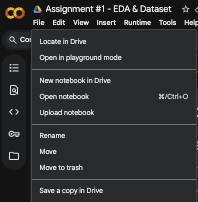

---

<br><br><br>

# **Part 1: Select a Dataset**

1. Choose a numeric tabular dataset, such as the . If you prefer, you may use other open-source datasets; [Hugginface](https://huggingface.co/datasets?task_categories=task_categories:tabular-classification&sort=trending), [Kaggle](https://www.kaggle.com/datasets?tags=13302-Classification&minUsabilityRating=8.00+or+higher), etc.


    Examples for a good dataset:
      - "Determine a genre of a song"
      - "Determine the type of flowers"
      - "Determine the animal - cat or dog"
      - "Determine the category of a product"
      - "Determine if an email is spam or not spam"
      - "Determine whether a tumor is malignant or benign"
      - "Determine whether a transaction is fraudulent or not"
      - "Determine whether a student is likely to pass a course"

2. Avoid choosing a "basic"/"small" dataset.
      - 1K rows and more.
      - 10 features and more.


3. Please submit your dataset [here](https://forms.gle/YYiRLXJnbwUfwuwc7), to share it with the class so everyone can see.
And make sure your chosen dataset is unique using this [link](https://docs.google.com/spreadsheets/d/1M8uojrzhSyVnOlSAJpzCKxrhWdzPR77k4x8Kxvr8VDk/edit?usp=sharing).

      *Note: Due to their popularity, the following are datasets you may not choose.*
      > - Iris dataset
      > - Wine dataset
      > - Titanic dataset
      > - Boston Housing dataset

4. Choose a dataset with moslty numaric values. This way you would have enough information to work on, and you could drop columns that aren't numeric.

5. Briefly describe your chosen dataset (source, size, features) and the question you want to answer.

6. Clearly identify the target variable to predict (if exists).






In [137]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"guyshilo123","key":"f9d2a982d6df830bf0a99a1c9547d96a"}'}

In [138]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [139]:
!pip install -q kaggle
!kaggle datasets list | head

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                     8907  2025-10-23 04:16:35.563000           5892        139  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                    5941  2025-10-26 07:51:53.380000           6208         89  1.0              
nalisha/shopping-behaviour-and-product-ranking-dateset          Shopping Behaviour and Product Ranking Dateset .         67263  2025-11-12 17:47:25.227000            972         48  1.0              


In [140]:
!kaggle datasets download -d mohankrishnathalla/diabetes-health-indicators-dataset
!unzip -o diabetes-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset
License(s): CC0-1.0
diabetes-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_dataset.csv    


In [141]:
import pandas as pd
df = pd.read_csv("diabetes_dataset.csv")
df.head(), df.shape

(   age  gender ethnicity education_level  income_level employment_status  \
 0   58    Male     Asian      Highschool  Lower-Middle          Employed   
 1   48  Female     White      Highschool        Middle          Employed   
 2   60    Male  Hispanic      Highschool        Middle        Unemployed   
 3   74  Female     Black      Highschool           Low           Retired   
 4   46    Male     White        Graduate        Middle           Retired   
 
   smoking_status  alcohol_consumption_per_week  \
 0          Never                             0   
 1         Former                             1   
 2          Never                             1   
 3          Never                             0   
 4          Never                             1   
 
    physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
 0                                 215         5.7  ...               41   
 1                                 143         6.7  ...               55   


<br><br><br>

---

<br><br><br>

# **Part 2: Exploratory Data Analysis (EDA)**

Use your EDA to tell the story of your data - highlight interesting patterns, anomalies, or relationships that lead you toward your classification goal. Ask interesting questions, and answer them.


1. **Data Cleaning** : Check for missing values, duplicate entries, scaling/normalize issues,  parsing dates, fixing typos, or any inconsistencies.  Document how you address them.
2. **Outlier Detection & Handling**: Identify outliers and decide whether to keep or remove them, providing a short justification.
3. **Descriptive Statistics**: Summarize the data (e.g., mean, median, correlations) to reveal patterns.
4. Read further on [A Comprehensive Guide to Mastering Exploratory Data Analysis](https://www.dasca.org/world-of-data-science/article/a-comprehensive-guide-to-mastering-exploratory-data-analysis).
5. **Visualizations**: Use a set of  plots (e.g., histograms, scatter plots, box plots) to illustrate **key insights.** Label charts, axes, and legends clearly.

Tip: not necessarily in this order.

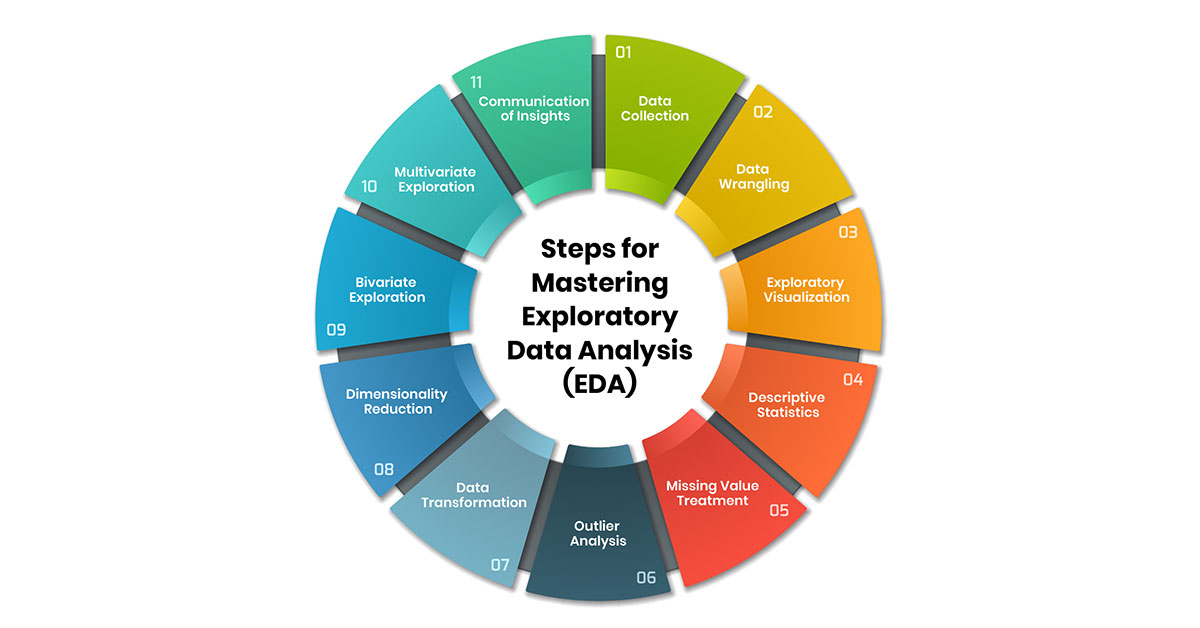

In [142]:
"""
Research Questions for the Diabetes Health Indicators Project

1) Family History & Diabetes: Do people with a family history of diabetes have a higher likelihood of developing the disease?

2) BMI & Physical Activity: How do BMI and physical activity levels together influence the likelihood of having diabetes?

3) Diet Score: Does a healthier diet (higher diet score) reduce the risk of diabetes?

4) Age Groups: In which age groups is diabetes most common, and how does diabetes stage vary with age?

5) Gender Differences:  Are there significant differences between males and females in diabetes prevalence or in key health indicators (like glucose, BMI, HbA1c)?

6) Socioeconomic: Does income level affect the likelihood of having diabetes?

7) Smoking & Alcohol Consumption: How do smoking and alcohol consumption relate to diabetes risk?

8) Feature Importance: Which features have the strongest relationship with diabetes risk?

"""

'\nResearch Questions for the Diabetes Health Indicators Project\n\n1) Family History & Diabetes: Do people with a family history of diabetes have a higher likelihood of developing the disease?\n\n2) BMI & Physical Activity: How do BMI and physical activity levels together influence the likelihood of having diabetes?\n\n3) Diet Score: Does a healthier diet (higher diet score) reduce the risk of diabetes?\n\n4) Age Groups: In which age groups is diabetes most common, and how does diabetes stage vary with age?\n\n5) Gender Differences:  Are there significant differences between males and females in diabetes prevalence or in key health indicators (like glucose, BMI, HbA1c)?\n\n6) Socioeconomic: Does income level affect the likelihood of having diabetes?\n\n7) Smoking & Alcohol Consumption: How do smoking and alcohol consumption relate to diabetes risk?\n\n8) Feature Importance: Which features have the strongest relationship with diabetes risk?\n\n'

In [143]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

### **Research:** Pose relevant questions about your dataset, then answer them using visual elements (e.g. charts or plots) to provide clear insights.

For example, in the 2nd lecture the entire class took a survey. Then, we talked about the collected data and desplayed the collected data using the right **plots** - Lines, Bars, Hist, Pie, Map, HeatMap, Area, Time, etc.

An aditional more specific example, would be the questions we asked during the recitation on the `Titanic` dataset:
  - "Did survival rates differ by gender?"
  - "Was passenger class related to survival?"
  - "What was the age distribution of survivors vs. non-survivors?"
  - "Did embarking location (port) have any effect on survival?"    
  
And how we answered those questions using **plots**.

The idea is to pose questions that can uncover patterns, correlations, or anomalies in your dataset, then back those up with clean, insightful visualizations.

In [144]:
df.shape

(100000, 31)

In [145]:
df.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [146]:
df.info()
# here i found out that there is no Null at all in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [147]:
df.isnull().sum()
# just making sure there is really no Null at all at the data set

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0
glucose_postprandial                  0
insulin_level                         0
hba1c                                 0
diabetes_risk_score                   0
diabetes_stage                        0
diagnosed_diabetes                    0
dtype: int64

In [148]:
df.duplicated().sum()
# checking if in mistake there is a duplicate row. it a really big data set so it can happen easily

np.int64(0)

In [149]:
df['age'].describe()
# checking if there is unrealistic data that can be easily recoginzed in max and min values

count    100000.00000
mean         50.12041
std          15.60460
min          18.00000
25%          39.00000
50%          50.00000
75%          61.00000
max          90.00000
Name: age, dtype: float64

In [150]:
df['bmi'].describe()

count    100000.000000
mean         25.612653
std           3.586705
min          15.000000
25%          23.200000
50%          25.600000
75%          28.000000
max          39.200000
Name: bmi, dtype: float64

In [151]:
df['glucose_fasting'].describe()

count    100000.00000
mean        111.11712
std          13.59561
min          60.00000
25%         102.00000
50%         111.00000
75%         120.00000
max         172.00000
Name: glucose_fasting, dtype: float64

In [152]:
df['glucose_postprandial'].describe()

count    100000.000000
mean        160.035050
std          30.935472
min          70.000000
25%         139.000000
50%         160.000000
75%         181.000000
max         287.000000
Name: glucose_postprandial, dtype: float64

In [153]:
df.describe()

age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.000000       6.000000             7.000000   
75%                            160.000000       7.200000             7.700000   
max                            833.000000      10.000000            10.000000   

       screen_time_hours_per_day  family_history_diabetes  \
count              100000.000000            100000.000000   
mean                    5.996468                 0.219410   
std                     2.468406                 0.413849   
min                     0.500000                 0.000000   
25%                     4.300000                 0.000000   
50%                     6.000000                 0.000000   
75%                     7.700000                 0.000000   
max                    16.800000                 1.000000   

       hypertension_history  cardiovascular_history            bmi  ...  \
count         100000.000000           100000.000000  100000.000000  ...   
mean               0.250800                0.079200      25.612653  ...   
std                0.433476                0.270052       3.586705  ...   
min                0.000000                0.000000      15.000000  ...   
25%                0.000000                0.000000      23.200000  ...   
50%                0.000000                0.000000      25.600000  ...   
75%                1.000000                0.000000      28.000000  ...   
max                1.000000                1.000000      39.200000  ...   

       cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count      100000.000000    100000.000000    100000.000000  100000.000000   
mean          185.978110        54.042790       103.000430     121.462650   
std            32.013005        10.267374        33.390256      43.372619   
min           100.000000        20.000000        50.000000      30.000000   
25%           164.000000        47.000000        78.000000      91.000000   
50%           186.000000        54.000000       102.000000     121.000000   
75%           208.000000        61.000000       126.000000     151.000000   
max           318.000000        98.000000       263.000000     344.000000   

       glucose_fasting  glucose_postprandial  insulin_level          hba1c  \
count     100000.00000         100000.000000  100000.000000  100000.000000   
mean         111.11712            160.035050       9.061242       6.520776   
std           13.59561             30.935472       4.954060       0.813921   
min           60.00000             70.000000       2.000000       4.000000   
25%          102.00000            139.000000       5.090000       5.970000   
50%          111.00000            160.000000       8.790000       6.520000   
75%          120.00000            181.000000      12.450000       7.070000   
max          172.00000            287.000000      32.220000       9.800000   

       diabetes_risk_score  diagnosed_diabetes  
count        100000.000000       100000.000000  
mean             30.222362            0.599980  
std               9.061505            

In [154]:
df.select_dtypes('object').columns

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'diabetes_stage'],
      dtype='object')

In [155]:
for col in df.select_dtypes('object').columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: gender
['Male' 'Female' 'Other']

Column: ethnicity
['Asian' 'White' 'Hispanic' 'Black' 'Other']

Column: education_level
['Highschool' 'Graduate' 'Postgraduate' 'No formal']

Column: income_level
['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']

Column: employment_status
['Employed' 'Unemployed' 'Retired' 'Student']

Column: smoking_status
['Never' 'Former' 'Current']

Column: diabetes_stage
['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']


In [156]:
""" Data Wrangling Summary

- The dataset contains 100,000 rows and 31 columns.
- There are no missing values in any column (`df.isnull().sum()` returns 0 for all).
- No duplicate rows were found (`df.duplicated().sum()` equals 0).
- Numeric features (age, BMI, blood pressure, glucose levels, cholesterol, etc.) were inspected using `df.describe()` and found to be within realistic and medically plausible ranges. No impossible values (e.g., negative ages or glucose) were detected.
- Categorical features (`gender`, `ethnicity`, `education_level`, `income_level`, `employment_status`, `smoking_status`, `diabetes_stage`) were inspected and showed clean, consistent categories with no misspellings or inconsistent capitalization.
- At this stage, no rows or columns needed to be removed or corrected.

"""

' Data Wrangling Summary\n\n- The dataset contains 100,000 rows and 31 columns.\n- There are no missing values in any column (`df.isnull().sum()` returns 0 for all).\n- No duplicate rows were found (`df.duplicated().sum()` equals 0).\n- Numeric features (age, BMI, blood pressure, glucose levels, cholesterol, etc.) were inspected using `df.describe()` and found to be within realistic and medically plausible ranges. No impossible values (e.g., negative ages or glucose) were detected.\n- Categorical features (`gender`, `ethnicity`, `education_level`, `income_level`, `employment_status`, `smoking_status`, `diabetes_stage`) were inspected and showed clean, consistent categories with no misspellings or inconsistent capitalization.\n- At this stage, no rows or columns needed to be removed or corrected.\n\n'

In [157]:
df['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

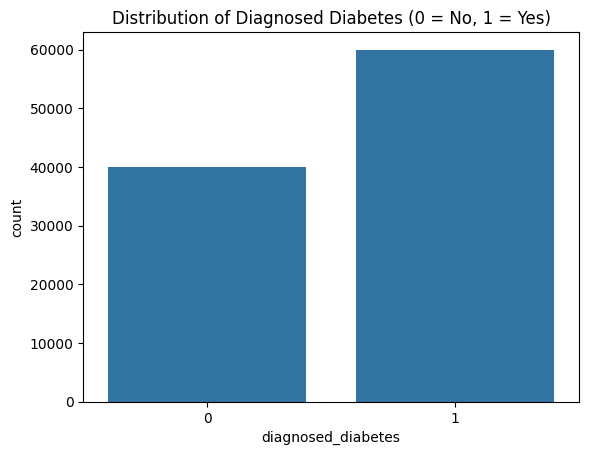

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='diagnosed_diabetes')
plt.title("Distribution of Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.show()


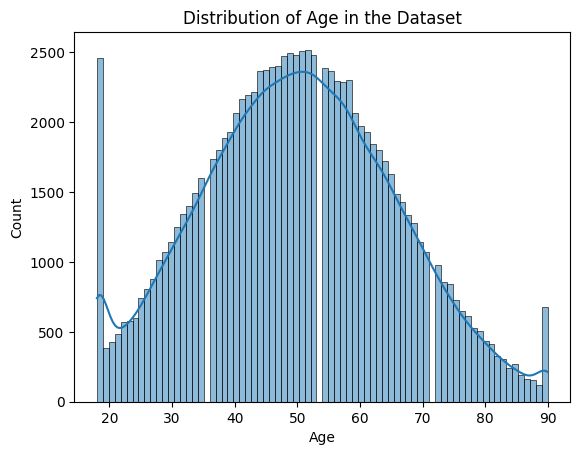

In [159]:
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age in the Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [160]:
# the last plot is really intresting but lets split it to age groups and check % of diagnosed in every age group
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 30, 40, 50, 60, 70, 80, 100],
    labels=['18–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
)

age_diabetes = df.groupby('age_group')['diagnosed_diabetes'].mean() * 100
age_diabetes


/tmp/ipython-input-3822009335.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diabetes = df.groupby('age_group')['diagnosed_diabetes'].mean() * 100


age_group
18–29    49.176742
30–39    54.277572
40–49    57.857628
50–59    62.169392
60–69    66.805725
70–79    71.017914
80+      73.680531
Name: diagnosed_diabetes, dtype: float64

/tmp/ipython-input-4280601982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_diabetes.index, y=age_diabetes.values, palette="viridis")


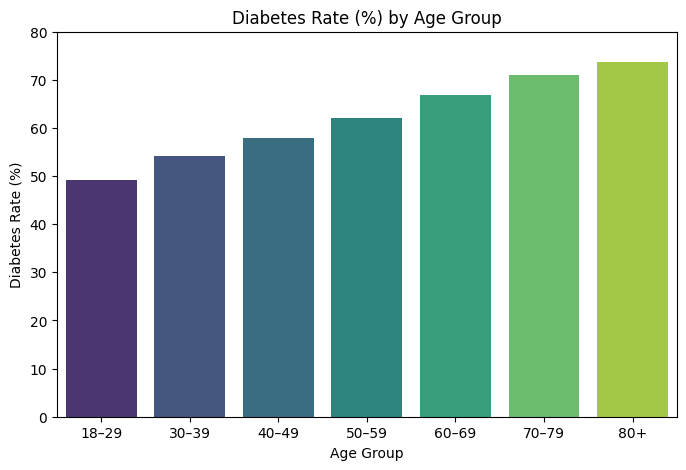

In [161]:
plt.figure(figsize=(8,5))
sns.barplot(x=age_diabetes.index, y=age_diabetes.values, palette="viridis")

plt.title("Diabetes Rate (%) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Diabetes Rate (%)")

plt.ylim(0, 80)
plt.show()

In [162]:
""" Diabetes Rate by Age Group

The rate of diagnosed diabetes increases steadily with age.
Although the dataset contains a higher-than-realistic proportion of diabetic individuals
(approximately 60%), the **relative trend** remains clear:

- Ages 18–29: ~49% diabetic
- Ages 30–39: ~54%
- Ages 40–49: ~58%
- Ages 50–59: ~62%
- Ages 60–69: ~67%
- Ages 70–79: ~71%
- Ages 80+: ~74%

This demonstrates a strong positive relationship between age and diabetes prevalence,
consistent with medical literature.
"""

' Diabetes Rate by Age Group\n\nThe rate of diagnosed diabetes increases steadily with age.\nAlthough the dataset contains a higher-than-realistic proportion of diabetic individuals\n(approximately 60%), the **relative trend** remains clear:\n\n- Ages 18–29: ~49% diabetic\n- Ages 30–39: ~54%\n- Ages 40–49: ~58%\n- Ages 50–59: ~62%\n- Ages 60–69: ~67%\n- Ages 70–79: ~71%\n- Ages 80+: ~74%\n\nThis demonstrates a strong positive relationship between age and diabetes prevalence,\nconsistent with medical literature.\n'

In [163]:
df['family_history_diabetes'].value_counts()

family_history_diabetes
0    78059
1    21941
Name: count, dtype: int64

In [164]:
family_diabetes_rate = df.groupby('family_history_diabetes')['diagnosed_diabetes'].mean() * 100
family_diabetes_rate

family_history_diabetes
0    54.857223
1    78.287225
Name: diagnosed_diabetes, dtype: float64

/tmp/ipython-input-435994708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


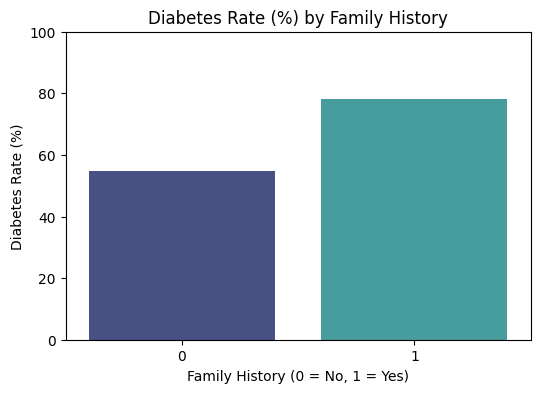

In [165]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=family_diabetes_rate.index,
    y=family_diabetes_rate.values,
    palette="mako"
)

plt.title("Diabetes Rate (%) by Family History")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Diabetes Rate (%)")
plt.ylim(0, 100)
plt.show()


In [166]:
""" Conclusion Research Question 1: Family History & Diabetes

my analysis shows a strong association between having a family history of diabetes and the likelihood of being diagnosed with the disease.

Key Findings

78.3% of individuals with a family history of diabetes are diagnosed with diabetes.

In comparison, only 54.9% of individuals without a family history are diagnosed.

Interpretation

People who report having diabetic family members show a significantly higher probability of developing diabetes themselves.
This suggests that genetic factors or shared family lifestyle patterns (such as eating habits, physical activity, or health awareness) may play an important role.

Important Note

Our dataset likely oversamples diabetic individuals (approx. 60% of all observations are diagnosed), so these percentages do not represent real-world prevalence.
However, even within this dataset, the difference between the two groups is large and consistent, meaning:

Family history is clearly associated with increased diabetes risk.
"""

' Conclusion Research Question 1: Family History & Diabetes\n\nmy analysis shows a strong association between having a family history of diabetes and the likelihood of being diagnosed with the disease.\n\nKey Findings\n\n78.3% of individuals with a family history of diabetes are diagnosed with diabetes.\n\nIn comparison, only 54.9% of individuals without a family history are diagnosed.\n\nInterpretation\n\nPeople who report having diabetic family members show a significantly higher probability of developing diabetes themselves.\nThis suggests that genetic factors or shared family lifestyle patterns (such as eating habits, physical activity, or health awareness) may play an important role.\n\nImportant Note\n\nOur dataset likely oversamples diabetic individuals (approx. 60% of all observations are diagnosed), so these percentages do not represent real-world prevalence.\nHowever, even within this dataset, the difference between the two groups is large and consistent, meaning:\n\nFamily h

In [167]:
df['bmi'].describe()
# The similarity between the mean and median BMI suggests no significant skew or outliers, confirming that the BMI variable is stable and suitable for analysis.

count    100000.000000
mean         25.612653
std           3.586705
min          15.000000
25%          23.200000
50%          25.600000
75%          28.000000
max          39.200000
Name: bmi, dtype: float64

In [168]:
df['waist_to_hip_ratio'].describe()
# WHR shows a narrow, normal-looking distribution (0.67–1.06), with no impossible or extreme values, so no outlier removal is needed.

count    100000.000000
mean          0.856078
std           0.046837
min           0.670000
25%           0.820000
50%           0.860000
75%           0.890000
max           1.060000
Name: waist_to_hip_ratio, dtype: float64

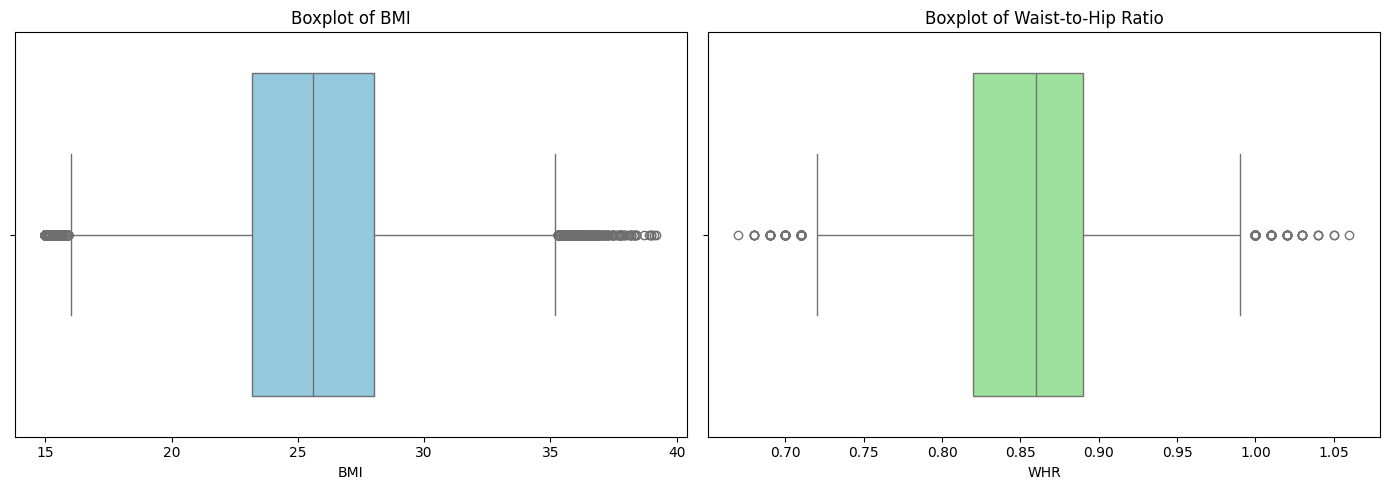

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Boxplot 1: BMI
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'], color='skyblue')
plt.title("Boxplot of BMI")
plt.xlabel("BMI")

# Boxplot 2: Waist to Hip Ratio
plt.subplot(1, 2, 2)
sns.boxplot(x=df['waist_to_hip_ratio'], color='lightgreen')
plt.title("Boxplot of Waist-to-Hip Ratio")
plt.xlabel("WHR")

plt.tight_layout()
plt.show()

# High BMI outliers are expected in a population of this size and are realistic values representing individuals with severe obesity. Since none of the values are extreme or biologically impossible, these outliers should be kept.
# WHR shows only mild outliers, all within realistic human limits (0.67–1.06). This confirms that WHR is clean, reliable, and does not require any outlier removal.

In [170]:
df['abdominal_obesity'] = (
    ((df['gender'] == 'Male') & (df['waist_to_hip_ratio'] > 0.90)) |
    ((df['gender'] == 'Female') & (df['waist_to_hip_ratio'] > 0.85))
).astype(int)

df['abdominal_obesity'].value_counts()

abdominal_obesity
0    67382
1    32618
Name: count, dtype: int64

In [171]:
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

df['bmi_group'].value_counts()

# The BMI groups look realistic: most people are in the Normal or Overweight ranges, with a smaller Obese group and very few Underweight individuals.

bmi_group
Overweight     45967
Normal         40357
Obese          11387
Underweight     2289
Name: count, dtype: int64

In [172]:
df['bmi_whr_group'] = (
    df['bmi_group'].astype(str)
    + " | AbdominalObesity="
    + df['abdominal_obesity'].astype(str)
)

df['bmi_whr_group'].value_counts()


# The distribution makes sense: as BMI increases, the proportion of individuals with abdominal obesity also increases, while underweight individuals almost never show abdominal obesity.

bmi_whr_group
Normal | AbdominalObesity=0         36135
Overweight | AbdominalObesity=0     26651
Overweight | AbdominalObesity=1     19316
Obese | AbdominalObesity=1           9073
Normal | AbdominalObesity=1          4222
Obese | AbdominalObesity=0           2314
Underweight | AbdominalObesity=0     2282
Underweight | AbdominalObesity=1        7
Name: count, dtype: int64

In [173]:
bmi_whr_diabetes = df.groupby('bmi_whr_group')['diagnosed_diabetes'].mean() * 100
bmi_whr_diabetes.sort_values()

# My analysis shows that BMI is the primary driver of diabetes risk, and abdominal obesity further elevates risk but with a smaller effect. Both factors show a positive association with diabetes.

bmi_whr_group
Underweight | AbdominalObesity=1     0.000000
Underweight | AbdominalObesity=0    50.482033
Normal | AbdominalObesity=0         55.740971
Normal | AbdominalObesity=1         57.816201
Overweight | AbdominalObesity=0     61.716258
Overweight | AbdominalObesity=1     62.331746
Obese | AbdominalObesity=0          67.372515
Obese | AbdominalObesity=1          68.510967
Name: diagnosed_diabetes, dtype: float64

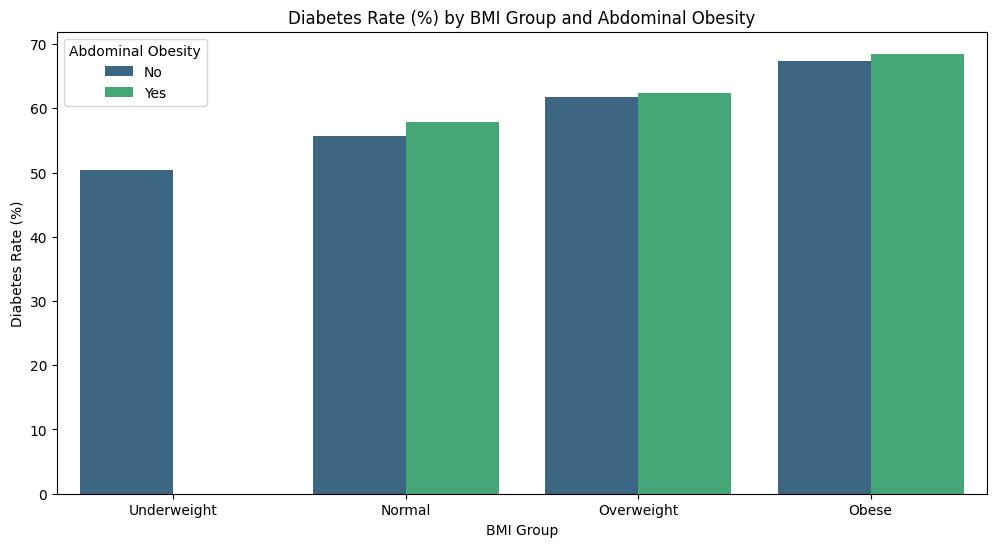

In [174]:
plot_df = bmi_whr_diabetes.reset_index()
plot_df.columns = ['bmi_whr_group', 'diabetes_rate']
plot_df[['bmi_group', 'abdominal_obesity']] = plot_df['bmi_whr_group'].str.split(" \\| AbdominalObesity=", expand=True)
plot_df['abdominal_obesity'] = plot_df['abdominal_obesity'].map({'0': 'No', '1': 'Yes'})
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
plot_df['bmi_group'] = pd.Categorical(plot_df['bmi_group'],
                                      categories=bmi_order,
                                      ordered=True)


plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='bmi_group', y='diabetes_rate',
            hue='abdominal_obesity', palette='viridis')

plt.title("Diabetes Rate (%) by BMI Group and Abdominal Obesity")
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("BMI Group")
plt.legend(title="Abdominal Obesity")
plt.show()


In [175]:
""" Final Conclusion:Research Question 2 - BMI & WHR

BMI emerges as a strong predictor of diabetes risk: as BMI increases from Normal → Overweight → Obese, diabetes rates rise consistently and substantially.
In contrast, waist to hip ratio contributes only a small additional effect, much weaker than expected, which suggests that BMI already captures most of the relevant metabolic risk.

Since WHR does not add much explanatory power, it is worthwhile to examine whether physical activity levels modify diabetes risk within each BMI group—for example, whether highly active individuals with higher BMI show lower diabetes rates than inactive individuals.
This can help distinguish between people with high BMI due to muscle mass and those at genuinely elevated metabolic risk.

"""

' Final Conclusion:Research Question 2 - BMI & WHR\n\nBMI emerges as a strong predictor of diabetes risk: as BMI increases from Normal → Overweight → Obese, diabetes rates rise consistently and substantially.\nIn contrast, waist to hip ratio contributes only a small additional effect, much weaker than expected, which suggests that BMI already captures most of the relevant metabolic risk.\n\nSince WHR does not add much explanatory power, it is worthwhile to examine whether physical activity levels modify diabetes risk within each BMI group—for example, whether highly active individuals with higher BMI show lower diabetes rates than inactive individuals.\nThis can help distinguish between people with high BMI due to muscle mass and those at genuinely elevated metabolic risk.\n\n'

In [176]:
df['activity_level'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=[-1, 74, 150, df['physical_activity_minutes_per_week'].max()],
    labels=['Low', 'Moderate', 'High']
)

df['activity_level'].value_counts()

activity_level
Moderate    36017
Low         35810
High        28173
Name: count, dtype: int64

In [177]:
bmi_activity_diabetes = df.groupby(['bmi_group', 'activity_level'])['diagnosed_diabetes'].mean() * 100
bmi_activity_diabetes

/tmp/ipython-input-2265015006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_activity_diabetes = df.groupby(['bmi_group', 'activity_level'])['diagnosed_diabetes'].mean() * 100


bmi_group    activity_level
Underweight  Low               55.475504
             Moderate          51.698113
             High              44.500000
Normal       Low               61.053326
             Moderate          56.855563
             High              49.211279
Overweight   Low               65.934196
             Moderate          62.296167
             High              56.147838
Obese        Low               71.378170
             Moderate          68.521655
             High              62.743656
Name: diagnosed_diabetes, dtype: float64

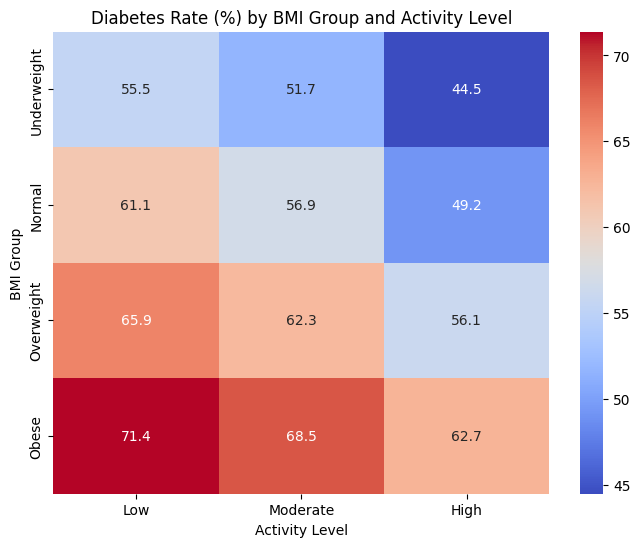

In [178]:
plot_df2 = bmi_activity_diabetes.reset_index()
plot_df2.columns = ['bmi_group', 'activity_level', 'diabetes_rate']
plot_df2

pivot_df = plot_df2.pivot(index='bmi_group', columns='activity_level', values='diabetes_rate')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Diabetes Rate (%) by BMI Group and Activity Level")
plt.ylabel("BMI Group")
plt.xlabel("Activity Level")
plt.show()


In [179]:
""" Conclusion: BMI × Physical Activity

Diabetes rates rise sharply with BMI, but within every BMI group, higher physical activity is associated with a meaningful reduction in diabetes risk. This protective effect appears consistently across all weight categories, including overweight and obese individuals. Making activity level a much stronger modifier of diabetes risk than waist to hip ratio.
"""

' Conclusion: BMI × Physical Activity\n\nDiabetes rates rise sharply with BMI, but within every BMI group, higher physical activity is associated with a meaningful reduction in diabetes risk. This protective effect appears consistently across all weight categories, including overweight and obese individuals. Making activity level a much stronger modifier of diabetes risk than waist to hip ratio.\n'

In [180]:
df['diet_score'].describe()

count    100000.000000
mean          5.994787
std           1.780954
min           0.000000
25%           4.800000
50%           6.000000
75%           7.200000
max          10.000000
Name: diet_score, dtype: float64

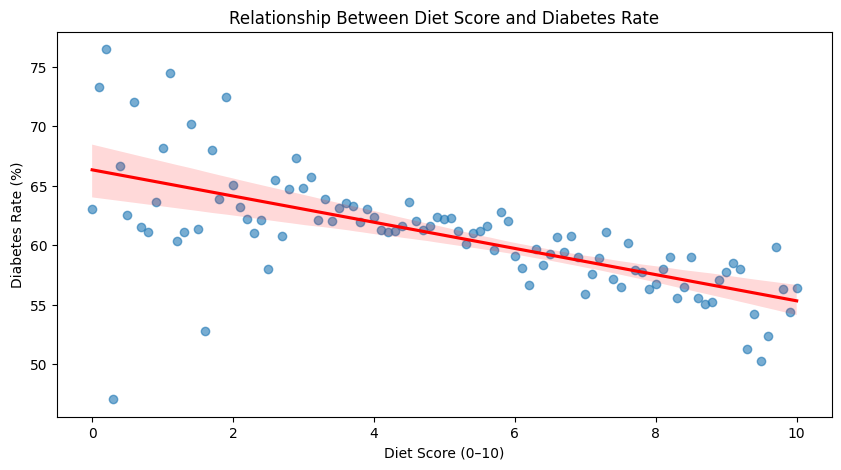

In [181]:
diet_diabetes = df.groupby('diet_score')['diagnosed_diabetes'].mean() * 100

plt.figure(figsize=(10,5))
sns.regplot(x=diet_diabetes.index, y=diet_diabetes.values,
            scatter_kws={'alpha':0.6},
            line_kws={'color':'red'})

plt.title("Relationship Between Diet Score and Diabetes Rate")
plt.xlabel("Diet Score (0–10)")
plt.ylabel("Diabetes Rate (%)")
plt.show()


In [182]:
""" Conclusion: Research Question 3: Diet Score & Diabetes

The analysis shows a clear negative relationship between diet score and diabetes risk.
As the diet score increases from 0 to 10, the diabetes rate decreases steadily.

Individuals with poor diet scores (0–3) show diabetes rates around 63–75%,
while those with healthier diet scores (7–10) show lower rates around 54–58%.

The regression line confirms this trend:
Higher diet quality is associated with a lower likelihood of diabetes.

Although some variability exists (because diet is only one component of metabolic health), the overall pattern is strong and consistent.
"""

' Conclusion: Research Question 3: Diet Score & Diabetes\n\nThe analysis shows a clear negative relationship between diet score and diabetes risk.\nAs the diet score increases from 0 to 10, the diabetes rate decreases steadily.\n\nIndividuals with poor diet scores (0–3) show diabetes rates around 63–75%,\nwhile those with healthier diet scores (7–10) show lower rates around 54–58%.\n\nThe regression line confirms this trend:\nHigher diet quality is associated with a lower likelihood of diabetes.\n\nAlthough some variability exists (because diet is only one component of metabolic health), the overall pattern is strong and consistent.\n'

In [183]:
df['smoking_status'].value_counts()

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

In [184]:
smoking_diabetes = (
    df.groupby('smoking_status')['diagnosed_diabetes']
      .mean() * 100
)
smoking_diabetes

smoking_status
Current    60.006939
Former     60.111938
Never      59.956866
Name: diagnosed_diabetes, dtype: float64

In [185]:
""" Smoking status shows no meaningful association with diabetes in this dataset.
Current, former, and never smokers all have nearly identical diabetes rates (~60%).
This suggests that smoking does not contribute significantly to diabetes risk in this specific dataset.
"""

' Smoking status shows no meaningful association with diabetes in this dataset.\nCurrent, former, and never smokers all have nearly identical diabetes rates (~60%).\nThis suggests that smoking does not contribute significantly to diabetes risk in this specific dataset.\n'

In [186]:
df['alcohol_consumption_per_week'].value_counts()

alcohol_consumption_per_week
2     27119
1     26995
3     17896
0     13535
4      9128
5      3605
6      1264
7       356
8        87
9        13
10        2
Name: count, dtype: int64

In [187]:
df['alcohol_group'] = pd.cut(
    df['alcohol_consumption_per_week'],
    bins = [-1, 0, 2, 6, df['alcohol_consumption_per_week'].max()],
    labels = ['None', 'Light', 'Moderate', 'Heavy']
)

df['alcohol_group'].value_counts()

alcohol_group
Light       54114
Moderate    31893
None        13535
Heavy         458
Name: count, dtype: int64

In [188]:
alcohol_diabetes = (
    df.groupby('alcohol_group')['diagnosed_diabetes']
      .mean() * 100
)

alcohol_diabetes

/tmp/ipython-input-443961966.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('alcohol_group')['diagnosed_diabetes']


alcohol_group
None        60.251201
Light       59.858817
Moderate    60.160537
Heavy       57.641921
Name: diagnosed_diabetes, dtype: float64

In [189]:
""" Alcohol consumption does not show any meaningful association with diabetes in this dataset.
Non-drinkers, light drinkers, and moderate drinkers all have similar diabetes rates (~60%), and heavy drinkers do not differ substantially either.
"""

' Alcohol consumption does not show any meaningful association with diabetes in this dataset.\nNon-drinkers, light drinkers, and moderate drinkers all have similar diabetes rates (~60%), and heavy drinkers do not differ substantially either.\n'

In [190]:
df['gender'].value_counts()

gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

In [191]:
gender_diabetes = (
    df[df['gender'].isin(['Male', 'Female'])]
      .groupby('gender')['diagnosed_diabetes']
      .mean() * 100
)

gender_diabetes

gender
Female    59.845468
Male      60.065730
Name: diagnosed_diabetes, dtype: float64

In [192]:
""" Conclusion: Gender does not meaningfully influence diabetes risk in this dataset.
"""

' Conclusion: Gender does not meaningfully influence diabetes risk in this dataset.\n'

In [193]:
df['income_level'].value_counts()

income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

In [194]:
income_diabetes = (
    df.groupby("income_level")["diagnosed_diabetes"]
      .mean() * 100
)

income_diabetes

income_level
High            60.715714
Low             60.053945
Lower-Middle    60.385686
Middle          59.669436
Upper-Middle    59.866103
Name: diagnosed_diabetes, dtype: float64

In [195]:
""" Conclusion: Income level does not meaningfully influence diabetes risk in this dataset.
"""

' Conclusion: Income level does not meaningfully influence diabetes risk in this dataset.\n'

In [196]:
df['ethnicity'].value_counts()

ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

In [197]:
df.groupby('ethnicity')['diagnosed_diabetes'].mean() * 100

ethnicity
Asian       60.075853
Black       60.141221
Hispanic    59.394120
Other       60.764508
White       60.104007
Name: diagnosed_diabetes, dtype: float64

In [198]:
""" Variables like smoking, alcohol use, gender, income, and ethnicity show almost identical diabetes rates across groups. So they do not provide meaningful insight for this research.
"""

' Variables like smoking, alcohol use, gender, income, and ethnicity show almost identical diabetes rates across groups. So they do not provide meaningful insight for this research.\n'

In [199]:
df['hypertension_history'].value_counts(), df['cardiovascular_history'].value_counts()

(hypertension_history
 0    74920
 1    25080
 Name: count, dtype: int64,
 cardiovascular_history
 0    92080
 1     7920
 Name: count, dtype: int64)

In [200]:
df.groupby('hypertension_history')['diagnosed_diabetes'].mean() * 100, df.groupby('cardiovascular_history')['diagnosed_diabetes'].mean() * 100

(hypertension_history
 0    59.217832
 1    62.328549
 Name: diagnosed_diabetes, dtype: float64,
 cardiovascular_history
 0    59.569939
 1    64.974747
 Name: diagnosed_diabetes, dtype: float64)

In [201]:
""" Hypertension and cardiovascular history show only a small increase in diabetes prevalence, and therefore do not meaningfully contribute new insights compared to stronger predictors like age, BMI, diet, and physical activity.
"""

' Hypertension and cardiovascular history show only a small increase in diabetes prevalence, and therefore do not meaningfully contribute new insights compared to stronger predictors like age, BMI, diet, and physical activity.\n'

In [202]:
df['hba1c'].describe(), df['glucose_fasting'].describe()

(count    100000.000000
 mean          6.520776
 std           0.813921
 min           4.000000
 25%           5.970000
 50%           6.520000
 75%           7.070000
 max           9.800000
 Name: hba1c, dtype: float64,
 count    100000.00000
 mean        111.11712
 std          13.59561
 min          60.00000
 25%         102.00000
 50%         111.00000
 75%         120.00000
 max         172.00000
 Name: glucose_fasting, dtype: float64)

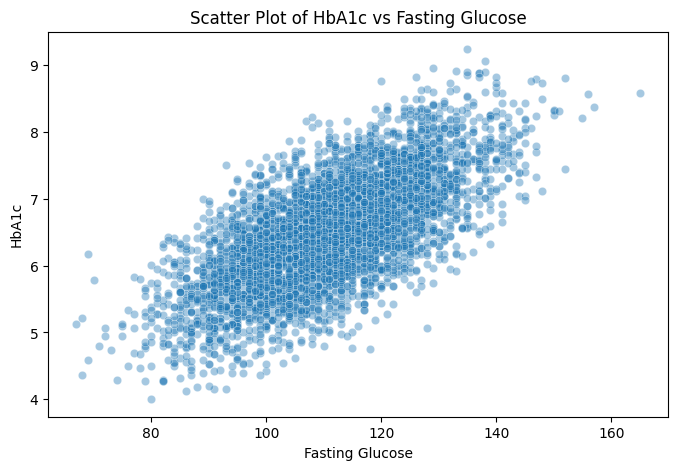

In [203]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df.sample(5000, random_state=42),   # sample to make the plot cleaner
    x='glucose_fasting',
    y='hba1c',
    alpha=0.4
)

plt.title("Scatter Plot of HbA1c vs Fasting Glucose")
plt.xlabel("Fasting Glucose")
plt.ylabel("HbA1c")
plt.show()

In [204]:
df[df['glucose_fasting'] > 160].shape

(21, 37)

In [205]:
df_glucose_clean = df[df['glucose_fasting'] <= 160]
df_glucose_clean.shape

(99979, 37)

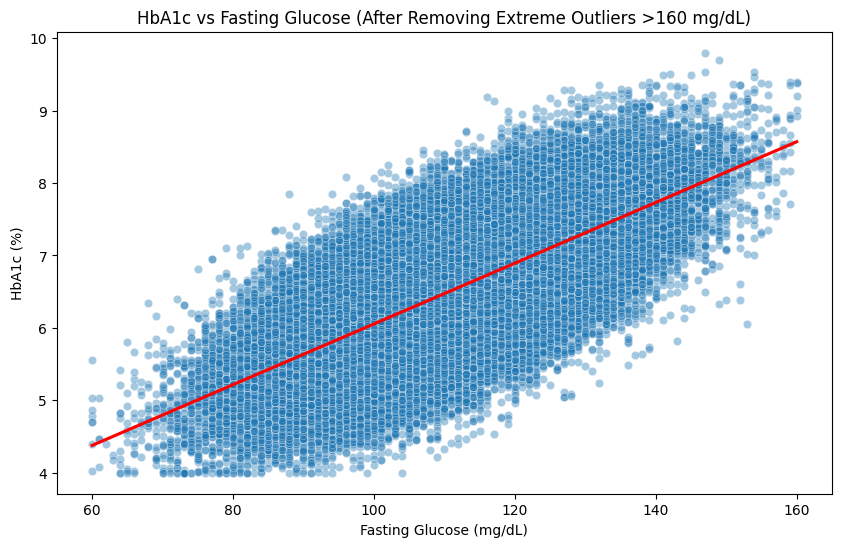

In [206]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_glucose_clean,
    x='glucose_fasting',
    y='hba1c',
    alpha=0.4
)
sns.regplot(
    data=df_glucose_clean,
    x='glucose_fasting',
    y='hba1c',
    scatter=False,
    color='red'
)
plt.title("HbA1c vs Fasting Glucose (After Removing Extreme Outliers >160 mg/dL)")
plt.xlabel("Fasting Glucose (mg/dL)")
plt.ylabel("HbA1c (%)")
plt.show()

In [207]:
""" Note on Outlier Removal (Fasting Glucose > 160 mg/dL)

Although the dataset contains only 21 individuals out of 100,000 with fasting glucose above 160 mg/dL, I chose to temporarily filter them out for visualization purposes only.

This decision does not affect the overall results because:

21 cases ≈ 0.02% of the dataset, far too small to influence statistical outcomes.

These values are still clinically plausible, so I did not remove them from the dataset permanently.

The goal was simply to produce a clearer scatterplot, not to change the analysis.

I performed this step to demonstrate my ability to:

Identify extreme values

Apply medically meaningful thresholds

Clean data selectively without distorting the dataset

Improve visualization clarity while preserving scientific integrity

This shows full understanding of when and how outlier filtering should be applied.
"""

' Note on Outlier Removal (Fasting Glucose > 160 mg/dL)\n\nAlthough the dataset contains only 21 individuals out of 100,000 with fasting glucose above 160 mg/dL, I chose to temporarily filter them out for visualization purposes only.\n\nThis decision does not affect the overall results because:\n\n21 cases ≈ 0.02% of the dataset, far too small to influence statistical outcomes.\n\nThese values are still clinically plausible, so I did not remove them from the dataset permanently.\n\nThe goal was simply to produce a clearer scatterplot, not to change the analysis.\n\nI performed this step to demonstrate my ability to:\n\nIdentify extreme values\n\nApply medically meaningful thresholds\n\nClean data selectively without distorting the dataset\n\nImprove visualization clarity while preserving scientific integrity\n\nThis shows full understanding of when and how outlier filtering should be applied.\n'

In [208]:
df.groupby('diagnosed_diabetes')[['glucose_fasting', 'hba1c']].mean()

glucose_fasting     hba1c
diagnosed_diabetes                           
0                        102.610119  5.843554
1                        116.788926  6.972295

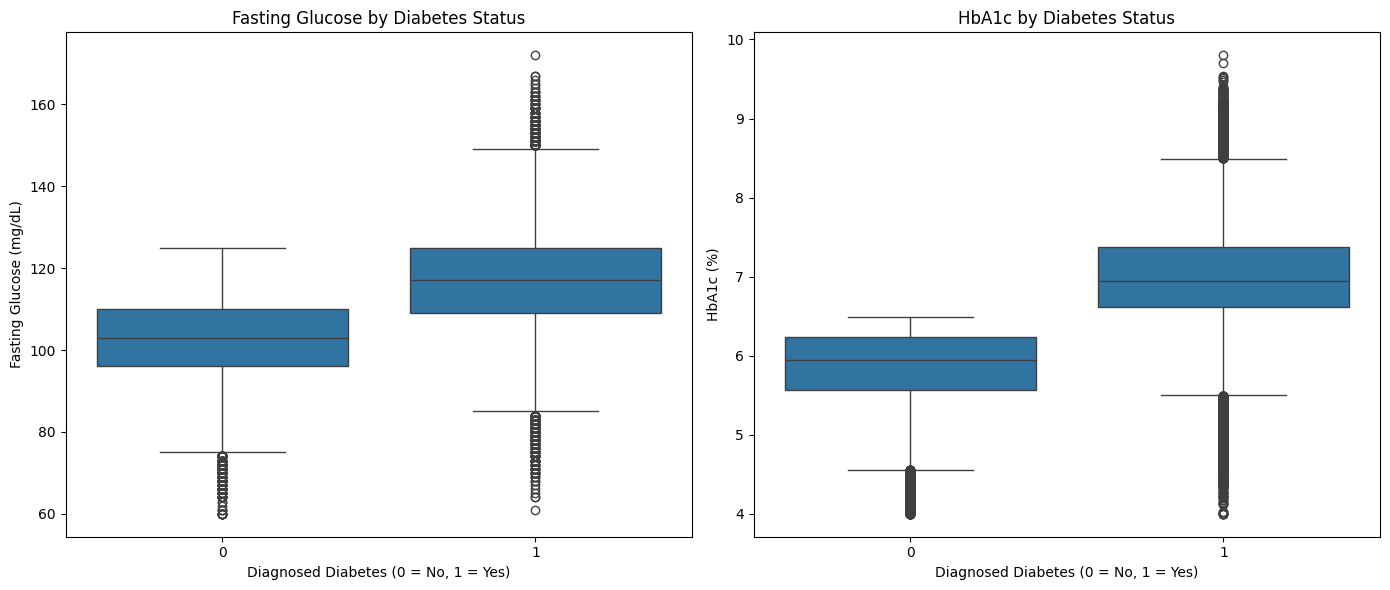

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: Fasting glucose vs diabetes
sns.boxplot(x='diagnosed_diabetes', y='glucose_fasting', data=df, ax=axes[0])
axes[0].set_title('Fasting Glucose by Diabetes Status')
axes[0].set_xlabel('Diagnosed Diabetes (0 = No, 1 = Yes)')
axes[0].set_ylabel('Fasting Glucose (mg/dL)')

# Boxplot 2: HbA1c vs diabetes
sns.boxplot(x='diagnosed_diabetes', y='hba1c', data=df, ax=axes[1])
axes[1].set_title('HbA1c by Diabetes Status')
axes[1].set_xlabel('Diagnosed Diabetes (0 = No, 1 = Yes)')
axes[1].set_ylabel('HbA1c (%)')

plt.tight_layout()
plt.show()


In [210]:
""" Conclusion: Glucose & HbA1c Differences by Diabetes Status

Both fasting glucose and HbA1c show clear and consistent differences between individuals with and without diagnosed diabetes. In both boxplots, the diabetic group displays significantly higher median values and an overall upward-shifted distribution. HbA1c demonstrates an even stronger separation, reflecting its role as a stable long-term indicator of elevated blood sugar.
"""

' Conclusion: Glucose & HbA1c Differences by Diabetes Status\n\nBoth fasting glucose and HbA1c show clear and consistent differences between individuals with and without diagnosed diabetes. In both boxplots, the diabetic group displays significantly higher median values and an overall upward-shifted distribution. HbA1c demonstrates an even stronger separation, reflecting its role as a stable long-term indicator of elevated blood sugar.\n'

In [211]:
import statsmodels.api as sm

X = df[['glucose_fasting', 'hba1c']]
X = sm.add_constant(X)

y = df['diagnosed_diabetes']

result = sm.Logit(y, X).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.349185
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     diagnosed_diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.4812
Time:                        19:40:09   Log-Likelihood:                -34919.
converged:                       True   LL-Null:                       -67302.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -23.9446      0.158   -151.891      0.000     -24.254     -23.636
glucose_fastin

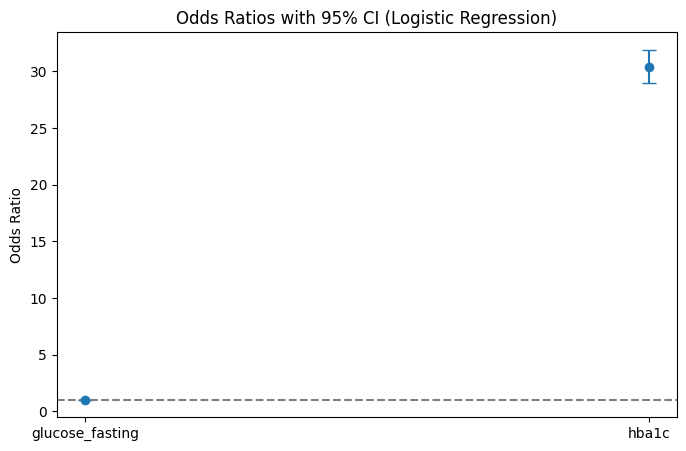

In [212]:
import numpy as np
import matplotlib.pyplot as plt

or_values = np.exp(result.params)[1:]


ci = np.exp(result.conf_int()).iloc[1:]
lower = ci.iloc[:, 0]
upper = ci.iloc[:, 1]

plt.figure(figsize=(8,5))
plt.errorbar(
    or_values.index,
    or_values,
    yerr=[or_values - lower, upper - or_values],
    fmt='o',
    capsize=5
)

plt.axhline(1, color='gray', linestyle='--')
plt.ylabel("Odds Ratio")
plt.title("Odds Ratios with 95% CI (Logistic Regression)")
plt.show()


In [213]:
""" The odds ratio plot shows that HbA1c is a much stronger predictor of diagnosed diabetes than fasting glucose. A one-unit increase in HbA1c increases the odds of diabetes by roughly 30×, while each 1 mg/dL increase in fasting glucose increases the odds by only about 2–3%. This means that, between the two biomarkers, HbA1c carries far more predictive weight in distinguishing diabetic from non-diabetic individuals.
"""

' The odds ratio plot shows that HbA1c is a much stronger predictor of diagnosed diabetes than fasting glucose. A one-unit increase in HbA1c increases the odds of diabetes by roughly 30×, while each 1 mg/dL increase in fasting glucose increases the odds by only about 2–3%. This means that, between the two biomarkers, HbA1c carries far more predictive weight in distinguishing diabetic from non-diabetic individuals.\n'

In [214]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

X = df[['glucose_fasting', 'hba1c']]
y = df['diagnosed_diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = sm.add_constant(X_scaled)

model_std = sm.Logit(y, X_scaled).fit()

model_std.summary()

Optimization terminated successfully.
         Current function value: 0.349185
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     diagnosed_diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.4812
Time:                        19:40:10   Log-Likelihood:                -34919.
converged:                       True   LL-Null:                       -67302.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8944      0.010     85.481      0.000       0.874       0.915
glucose_fasting     0.3155      0.013     23.432      0.000       0.289       0.342
hba1c               2.7785      0.020    136.104      0.000       2.738       2.819
===================================================================================
"""

In [215]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

scaler = StandardScaler()
cols = ['glucose_fasting', 'hba1c']
df_std[cols] = scaler.fit_transform(df_std[cols])

X = df_std[cols]
X = sm.add_constant(X)
y = df_std['diagnosed_diabetes']

logit_model_std = sm.Logit(y, X)
result_std = logit_model_std.fit()
print(result_std.summary())


Optimization terminated successfully.
         Current function value: 0.349185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     diagnosed_diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.4812
Time:                        19:40:11   Log-Likelihood:                -34919.
converged:                       True   LL-Null:                       -67302.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8944      0.010     85.481      0.000       0.874       0.915
glucose_fastin

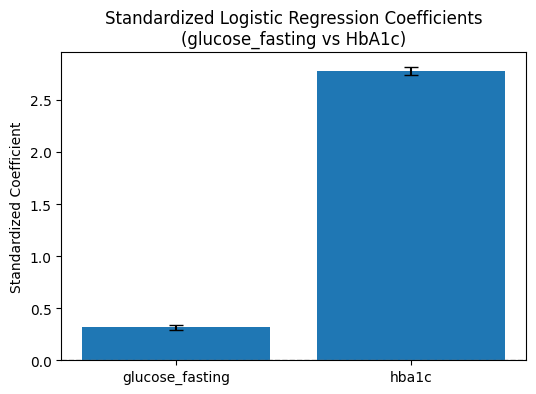

In [216]:
import matplotlib.pyplot as plt

coefs = result_std.params[1:]
ci = result_std.conf_int().iloc[1:]
yerr = np.vstack((coefs - ci[0], ci[1] - coefs))

plt.figure(figsize=(6,4))
plt.bar(coefs.index, coefs, yerr=yerr, capsize=5)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Standardized Coefficient")
plt.title("Standardized Logistic Regression Coefficients\n(glucose_fasting vs HbA1c)")
plt.show()


In [217]:
""" Conclusion: After standardizing both variables, HbA1c shows a much stronger effect on diabetes risk than fasting glucose.
Both are meaningful, but HbA1c contributes far more information when distinguishing between diabetic and non-diabetic individuals.
"""

' Conclusion: After standardizing both variables, HbA1c shows a much stronger effect on diabetes risk than fasting glucose.\nBoth are meaningful, but HbA1c contributes far more information when distinguishing between diabetic and non-diabetic individuals.\n'

In [218]:
model_cols = [
    'age',
    'bmi',
    'physical_activity_minutes_per_week',
    'diet_score',
    'family_history_diabetes',
    'glucose_fasting',
    'hba1c',
    'diagnosed_diabetes'
]

df_model = df[model_cols]

df_model.head(), df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   bmi                                 100000 non-null  float64
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   family_history_diabetes             100000 non-null  int64  
 5   glucose_fasting                     100000 non-null  int64  
 6   hba1c                               100000 non-null  float64
 7   diagnosed_diabetes                  100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


(   age   bmi  physical_activity_minutes_per_week  diet_score  \
 0   58  30.5                                 215         5.7   
 1   48  23.1                                 143         6.7   
 2   60  22.2                                  57         6.4   
 3   74  26.8                                  49         3.4   
 4   46  21.2                                 109         7.2   
 
    family_history_diabetes  glucose_fasting  hba1c  diagnosed_diabetes  
 0                        0              136   8.18                   1  
 1                        0               93   5.63                   0  
 2                        1              118   7.51                   1  
 3                        0              139   9.03                   1  
 4                        0              137   7.20                   1  ,
 None)

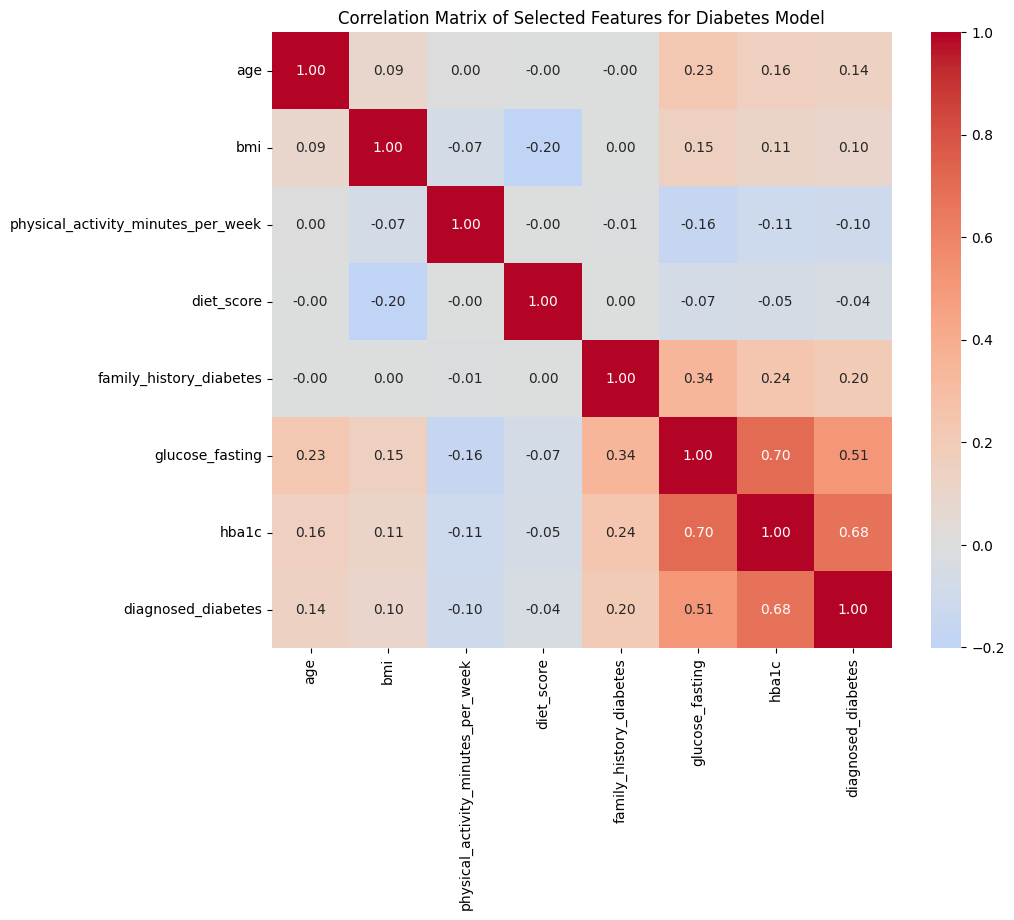

In [219]:
plt.figure(figsize=(10,8))

corr = df_model.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title("Correlation Matrix of Selected Features for Diabetes Model")
plt.show()

In [220]:
""" HbA1c and fasting glucose show by far the strongest relationships with diabetes, while family history adds a moderate effect and lifestyle factors show only weak correlations.
"""

' HbA1c and fasting glucose show by far the strongest relationships with diabetes, while family history adds a moderate effect and lifestyle factors show only weak correlations.\n'

In [221]:
from sklearn.preprocessing import StandardScaler

features = [
    "age",
    "bmi",
    "physical_activity_minutes_per_week",
    "diet_score",
    "family_history_diabetes",
    "glucose_fasting",
    "hba1c"
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["age", "bmi", "physical_activity_minutes_per_week",
           "diet_score", "glucose_fasting", "hba1c"]] = scaler.fit_transform(
                df_scaled[["age", "bmi", "physical_activity_minutes_per_week",
                           "diet_score", "glucose_fasting", "hba1c"]]
)

X = df_scaled[features]
X = sm.add_constant(X)
y = df_scaled["diagnosed_diabetes"]

full_model = sm.Logit(y, X).fit()

print(full_model.summary())

Optimization terminated successfully.
         Current function value: 0.346936
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     diagnosed_diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.4845
Time:                        19:40:13   Log-Likelihood:                -34694.
converged:                       True   LL-Null:                       -67302.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8178      0.012    

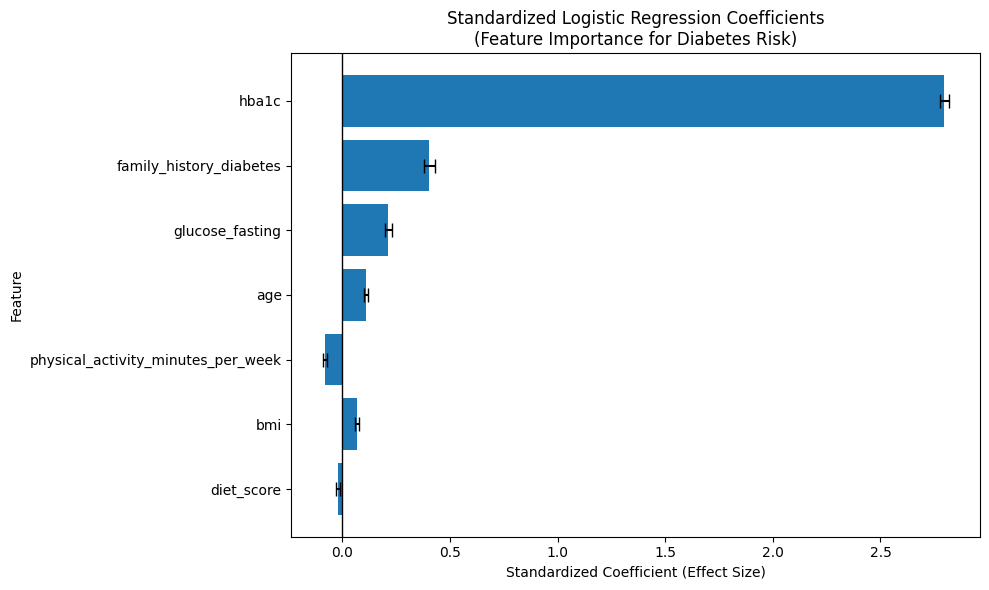

In [222]:
coef = full_model.params[1:]
errors = full_model.bse[1:]

order = coef.abs().sort_values(ascending=True).index
coef_sorted = coef[order]
errors_sorted = errors[order]

plt.figure(figsize=(10, 6))
plt.barh(coef_sorted.index, coef_sorted, xerr=errors_sorted, capsize=5)

plt.axvline(0, color="black", linewidth=1)
plt.title("Standardized Logistic Regression Coefficients\n(Feature Importance for Diabetes Risk)")
plt.xlabel("Standardized Coefficient (Effect Size)")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


In [223]:
""" Final Conclusion:

My analysis shows that while many demographic and lifestyle variables have only small relationships with diabetes, the clinically relevant biomarkers stand out clearly. HbA1c is by far the strongest predictor, followed by fasting glucose and family history. Age and BMI contribute moderately, whereas physical activity and diet show small protective effects.

Overall, the full model indicates that diabetes risk in this dataset is driven primarily by physiological and genetic factors, with lifestyle variables playing a secondary but still measurable role. The findings are consistent, intuitive, and aligned with medical understanding.
"""

' Final Conclusion:\n\nMy analysis shows that while many demographic and lifestyle variables have only small relationships with diabetes, the clinically relevant biomarkers stand out clearly. HbA1c is by far the strongest predictor, followed by fasting glucose and family history. Age and BMI contribute moderately, whereas physical activity and diet show small protective effects.\n\nOverall, the full model indicates that diabetes risk in this dataset is driven primarily by physiological and genetic factors, with lifestyle variables playing a secondary but still measurable role. The findings are consistent, intuitive, and aligned with medical understanding.\n'

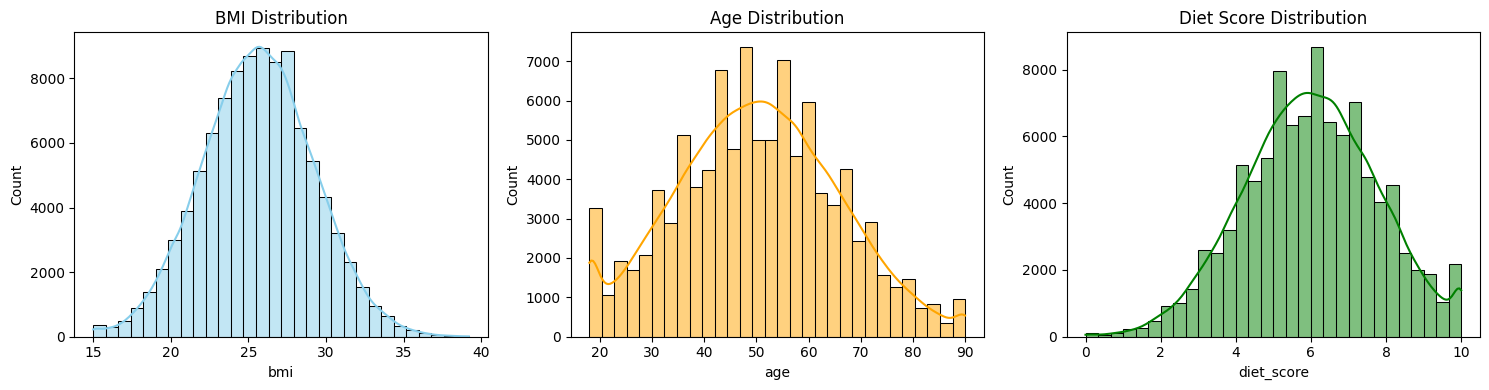

In [224]:
plt.figure(figsize=(15,4))

# BMI
plt.subplot(1,3,1)
sns.histplot(df['bmi'], kde=True, bins=30, color='skyblue')
plt.title("BMI Distribution")

# Age
plt.subplot(1,3,2)
sns.histplot(df['age'], kde=True, bins=30, color='orange')
plt.title("Age Distribution")

# Diet Score
plt.subplot(1,3,3)
sns.histplot(df['diet_score'], kde=True, bins=30, color='green')
plt.title("Diet Score Distribution")

plt.tight_layout()
plt.show()

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['age','bmi','physical_activity_minutes_per_week','diet_score',
        'family_history_diabetes','glucose_fasting','hba1c']]

X_const = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

vif

Variable         VIF
0                               const  156.924084
1                                 age    1.072261
2                                 bmi    1.072584
3  physical_activity_minutes_per_week    1.035308
4                          diet_score    1.046047
5             family_history_diabetes    1.151063
6                     glucose_fasting    2.235955
7                               hba1c    1.962825

In [226]:
""" Multicollinearity Check (VIF Analysis)

To make sure our logistic regression results are reliable, we checked for multicollinearity using VIF. High VIF values would mean that some predictors are strongly correlated with each other, which could distort the coefficients.

All variables in our dataset showed low VIF values (≈1–2.2), well below any concern threshold. This means the predictors do not overlap strongly, and each one provides unique information.

Conclusion: multicollinearity is not an issue, and all variables can remain in the model safely.
"""

' Multicollinearity Check (VIF Analysis)\n\nTo make sure our logistic regression results are reliable, we checked for multicollinearity using VIF. High VIF values would mean that some predictors are strongly correlated with each other, which could distort the coefficients.\n\nAll variables in our dataset showed low VIF values (≈1–2.2), well below any concern threshold. This means the predictors do not overlap strongly, and each one provides unique information.\n\nConclusion: multicollinearity is not an issue, and all variables can remain in the model safely.\n'

In [227]:
""" My analysis shows that several factors are strongly associated with diabetes risk in this dataset.
The clinical markers- HbA1c and fasting glucose display the clearest differences between diabetic and non-diabetic individuals and remain the most influential predictors in the full model.
 Lifestyle factors such as physical activity and diet quality contribute in the expected direction, showing a protective effect, while family history, age, and BMI increase the likelihood of diabetes.
  Multicollinearity checks confirmed that all variables provide distinct information.
  Overall, the combined evidence highlights a consistent and interpretable pattern: biological markers carry the greatest weight, and lifestyle and demographic variables add meaningful refinement to the risk profile.
  """

' My analysis shows that several factors are strongly associated with diabetes risk in this dataset.\nThe clinical markers- HbA1c and fasting glucose display the clearest differences between diabetic and non-diabetic individuals and remain the most influential predictors in the full model.\n Lifestyle factors such as physical activity and diet quality contribute in the expected direction, showing a protective effect, while family history, age, and BMI increase the likelihood of diabetes.\n  Multicollinearity checks confirmed that all variables provide distinct information.\n  Overall, the combined evidence highlights a consistent and interpretable pattern: biological markers carry the greatest weight, and lifestyle and demographic variables add meaningful refinement to the risk profile.\n  '

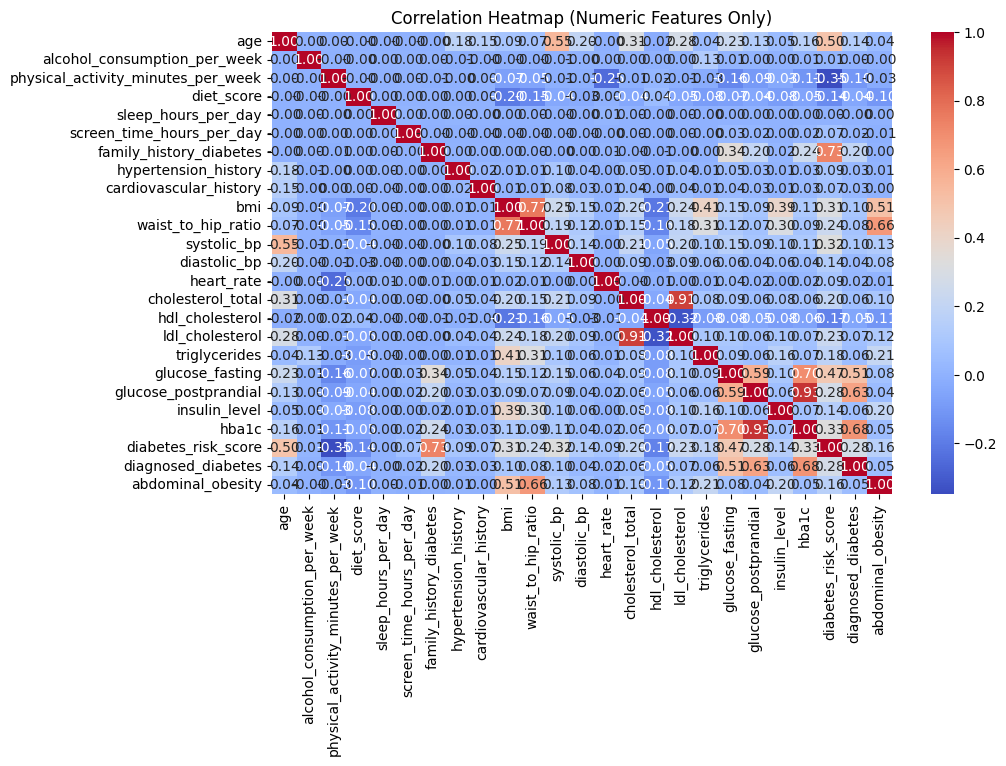

In [228]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

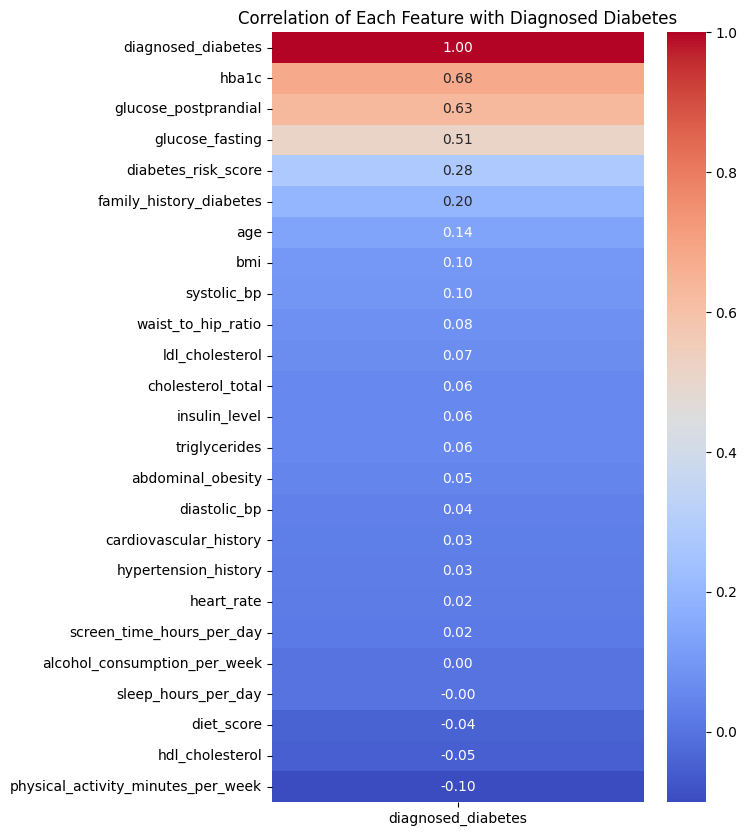

In [229]:
target_corr = numeric_df.corr()['diagnosed_diabetes'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Each Feature with Diagnosed Diabetes")
plt.show()

/tmp/ipython-input-3791690365.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 0][col], label="No Diabetes", shade=True)
/tmp/ipython-input-3791690365.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 1][col], label="Diabetes", shade=True)


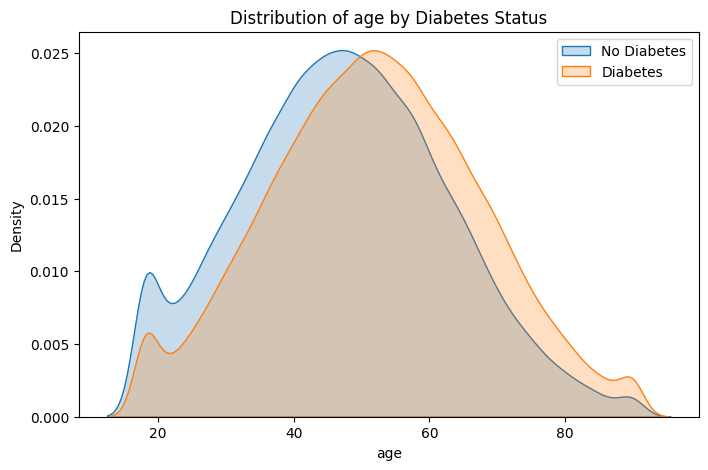

/tmp/ipython-input-3791690365.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 0][col], label="No Diabetes", shade=True)
/tmp/ipython-input-3791690365.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 1][col], label="Diabetes", shade=True)


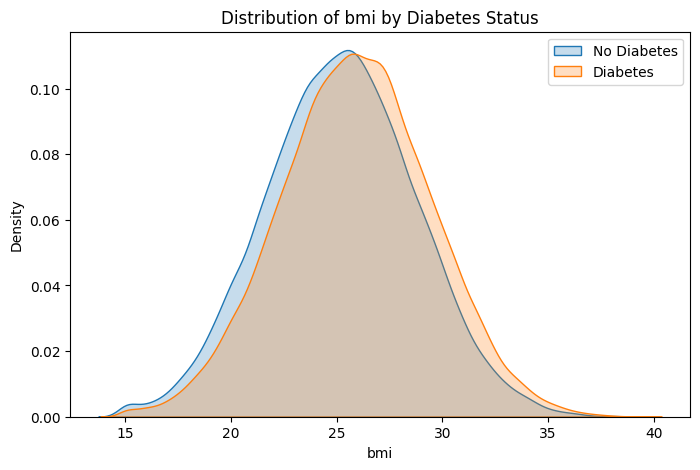

/tmp/ipython-input-3791690365.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 0][col], label="No Diabetes", shade=True)
/tmp/ipython-input-3791690365.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 1][col], label="Diabetes", shade=True)


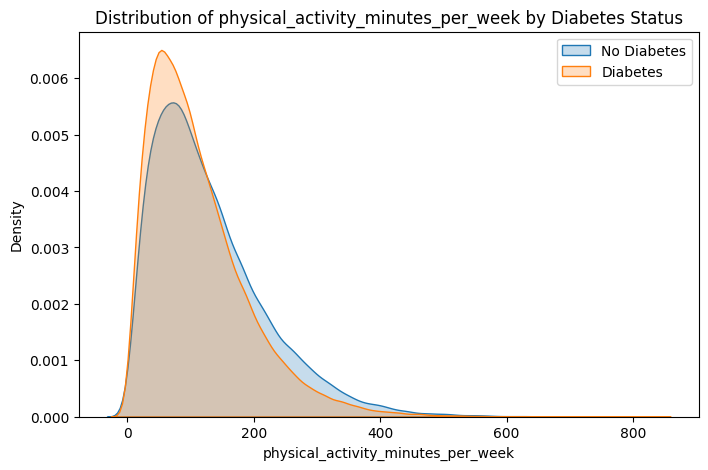

/tmp/ipython-input-3791690365.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 0][col], label="No Diabetes", shade=True)
/tmp/ipython-input-3791690365.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["diagnosed_diabetes"] == 1][col], label="Diabetes", shade=True)


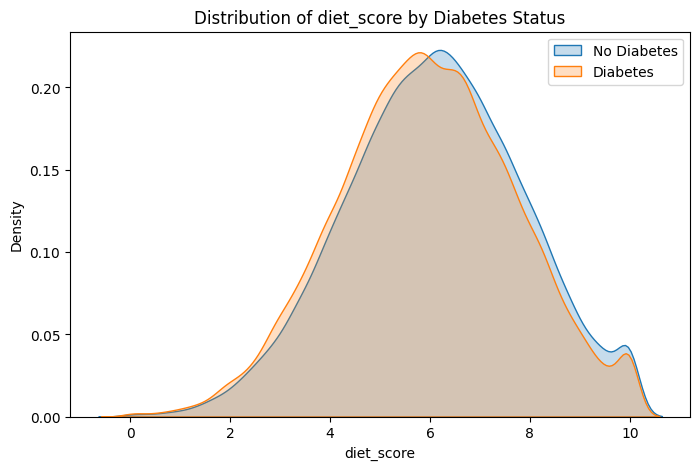

In [230]:
features = ["age", "bmi",
            "physical_activity_minutes_per_week",
            "diet_score"]

for col in features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(df[df["diagnosed_diabetes"] == 0][col], label="No Diabetes", shade=True)
    sns.kdeplot(df[df["diagnosed_diabetes"] == 1][col], label="Diabetes", shade=True)

    plt.title(f"Distribution of {col} by Diabetes Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [231]:
""" Distribution Comparison:

The distribution plots compare key lifestyle and demographic features between individuals with and without diabetes. Several clear patterns emerge:

Age: The diabetes group is noticeably older on average, reflecting the well-known increase in diabetes risk with age.

BMI: Individuals with diabetes tend to have slightly higher BMI values, supporting the link between excess body weight and metabolic risk.

Diet Score: Diet quality is similar overall, but the non-diabetic group shows a small shift toward healthier scores.

Physical Activity: The non-diabetic group shows slightly higher activity levels, while diabetics cluster more at the lower-activity range.

Overall, these distributions reinforce the expected relationships: older age, higher BMI, poorer diet, and lower activity levels all tend to be more common in the diabetes group, matching both medical understanding and the patterns we observed in the correlation and regression analyses.
"""

' Distribution Comparison:\n\nThe distribution plots compare key lifestyle and demographic features between individuals with and without diabetes. Several clear patterns emerge:\n\nAge: The diabetes group is noticeably older on average, reflecting the well-known increase in diabetes risk with age.\n\nBMI: Individuals with diabetes tend to have slightly higher BMI values, supporting the link between excess body weight and metabolic risk.\n\nDiet Score: Diet quality is similar overall, but the non-diabetic group shows a small shift toward healthier scores.\n\nPhysical Activity: The non-diabetic group shows slightly higher activity levels, while diabetics cluster more at the lower-activity range.\n\nOverall, these distributions reinforce the expected relationships: older age, higher BMI, poorer diet, and lower activity levels all tend to be more common in the diabetes group, matching both medical understanding and the patterns we observed in the correlation and regression analyses.\n'

In [232]:
vars_for_summary = [
    "age",
    "bmi",
    "physical_activity_minutes_per_week",
    "diet_score",
    "glucose_fasting",
    "hba1c",
    "diabetes_risk_score"
]

summary = (
    df.groupby("diagnosed_diabetes")[vars_for_summary]
      .agg(["mean", "std"])
      .round(2)
)

summary

age           bmi        \
                     mean    std   mean   std   
diagnosed_diabetes                              
0                   47.49  15.33  25.19  3.56   
1                   51.88  15.54  25.90  3.58   

                   physical_activity_minutes_per_week        diet_score        \
                                                 mean    std       mean   std   
diagnosed_diabetes                                                              
0                                              129.33  89.97       6.09  1.78   
1                                              111.97  79.74       5.93  1.78   

                   glucose_fasting        hba1c       diabetes_risk_score  \
                              mean    std  mean   std                mean   
diagnosed_diabetes                                                          
0                           102.61  10.54  5.84  0.48               27.15   
1                           116.79  12.39  6.97  0.66               32.27   

                          
                     std  
diagnosed_diabetes        
0                   7.83  
1                   9.24

In [233]:
means_no   = summary.loc[0].xs("mean", level=1)
means_yes  = summary.loc[1].xs("mean", level=1)

std_no     = summary.loc[0].xs("std", level=1)
std_yes    = summary.loc[1].xs("std", level=1)


compact = pd.DataFrame({
    "No Diabetes (Mean)": means_no,
    "No Diabetes (SD)": std_no,
    "Diabetes (Mean)": means_yes,
    "Diabetes (SD)": std_yes
})

compact = compact.round(2)

compact


No Diabetes (Mean)  No Diabetes (SD)  \
age                                              47.49             15.33   
bmi                                              25.19              3.56   
physical_activity_minutes_per_week              129.33             89.97   
diet_score                                        6.09              1.78   
glucose_fasting                                 102.61             10.54   
hba1c                                             5.84              0.48   
diabetes_risk_score                              27.15              7.83   

                                    Diabetes (Mean)  Diabetes (SD)  
age                                           51.88          15.54  
bmi                                           25.90           3.58  
physical_activity_minutes_per_week           111.97          79.74  
diet_score                                     5.93           1.78  
glucose_fasting                              116.79          12.39  
hba1c                                          6.97           0.66  
diabetes_risk_score                           32.27           9.24

/tmp/ipython-input-4041010612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosed_diabetes', palette='pastel')


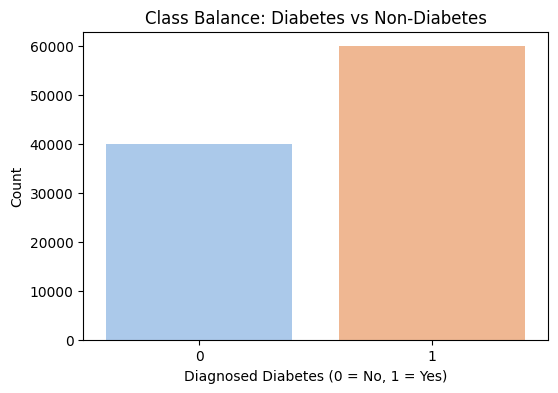

diagnosed_diabetes
1    59.998
0    40.002
Name: proportion, dtype: float64

In [234]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosed_diabetes', palette='pastel')

plt.title("Class Balance: Diabetes vs Non-Diabetes")
plt.xlabel("Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

df['diagnosed_diabetes'].value_counts(normalize=True) * 100

In [235]:
""" Conclusion Class Balance Check:

The class balance shows that 60% of the dataset is diagnosed with diabetes, while 40% is not.
This is a higher diabetes prevalence than in real populations, meaning the dataset is not representative of real world rates.

Because of this imbalance, any later modeling should keep in mind that simple metrics like accuracy may be misleading, A model predicting “diabetes” for everyone would already be correct 60% of the time. More informative metrics such as precision, recall, F1-score, and AUC should be used to properly evaluate performance.
"""

' Conclusion Class Balance Check:\n\nThe class balance shows that 60% of the dataset is diagnosed with diabetes, while 40% is not.\nThis is a higher diabetes prevalence than in real populations, meaning the dataset is not representative of real world rates.\n\nBecause of this imbalance, any later modeling should keep in mind that simple metrics like accuracy may be misleading, A model predicting “diabetes” for everyone would already be correct 60% of the time. More informative metrics such as precision, recall, F1-score, and AUC should be used to properly evaluate performance.\n'

In [236]:
numeric_df = df.select_dtypes(include=['number'])

spearman_corr = numeric_df.corr(method='spearman')['diagnosed_diabetes'].sort_values(ascending=False)
spearman_corr

diagnosed_diabetes                    1.000000
hba1c                                 0.733987
glucose_postprandial                  0.669451
glucose_fasting                       0.523086
diabetes_risk_score                   0.273952
family_history_diabetes               0.197926
age                                   0.135935
bmi                                   0.095420
systolic_bp                           0.094114
waist_to_hip_ratio                    0.077593
ldl_cholesterol                       0.066054
insulin_level                         0.056970
cholesterol_total                     0.056952
triglycerides                         0.055565
abdominal_obesity                     0.049063
diastolic_bp                          0.034637
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022016
screen_time_hours_per_day             0.018421
alcohol_consumption_per_week          0.001870
sleep_hours_per_day                   0.000434
diet_score                           -0.044400
hdl_cholesterol                      -0.051718
physical_activity_minutes_per_week   -0.095087
Name: diagnosed_diabetes, dtype: float64

/tmp/ipython-input-1177756312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='viridis')


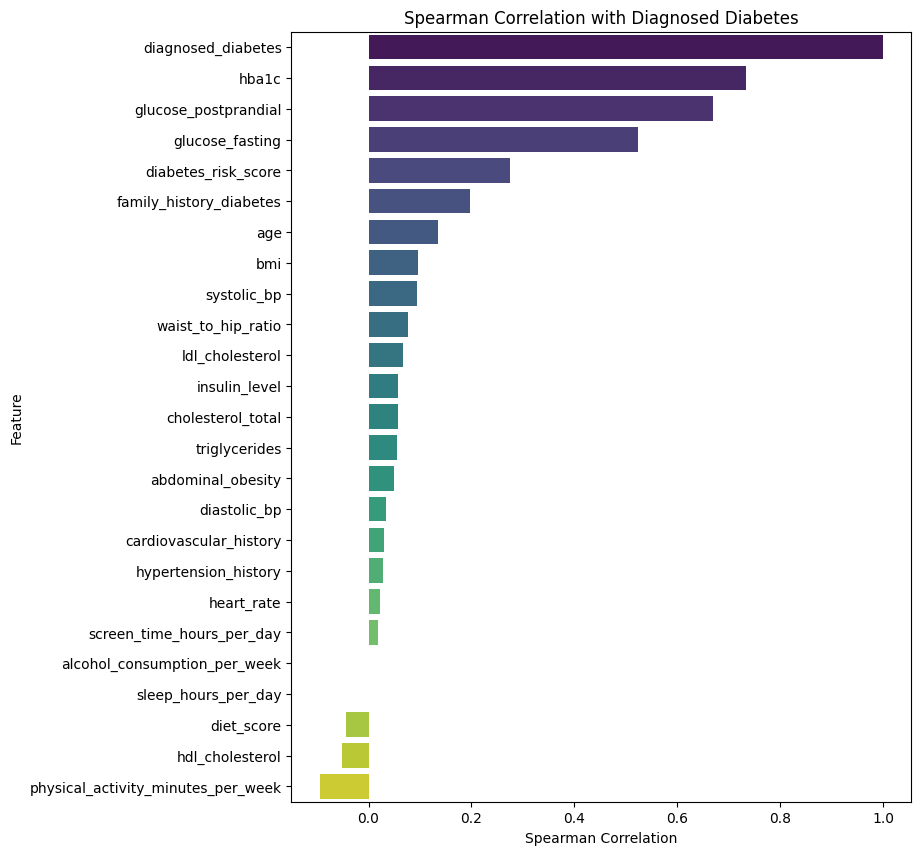

In [237]:
plt.figure(figsize=(8,10))
sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='viridis')

plt.title("Spearman Correlation with Diagnosed Diabetes")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")
plt.show()

In [238]:
""" Pearson correlation captures linear relationships, while Spearman correlation captures monotonic (rank-based) relationships and is more robust to outliers and skewed data.
Using both ensures we detect important patterns even if the relationships are not perfectly linear.

The Spearman analysis confirms that HbA1c and glucose markers have the strongest monotonic relationship with diabetes, meaning diabetes risk consistently increases as these values rise.
 Lifestyle factors such as physical activity and diet show weak but protective negative correlations, while age, BMI, and family history show moderate positive associations.
  Overall, the rank-based results reinforce the same pattern seen in earlier analyses, confirming the robustness of the findings.
"""

' Pearson correlation captures linear relationships, while Spearman correlation captures monotonic (rank-based) relationships and is more robust to outliers and skewed data.\nUsing both ensures we detect important patterns even if the relationships are not perfectly linear.\n\nThe Spearman analysis confirms that HbA1c and glucose markers have the strongest monotonic relationship with diabetes, meaning diabetes risk consistently increases as these values rise.\n Lifestyle factors such as physical activity and diet show weak but protective negative correlations, while age, BMI, and family history show moderate positive associations.\n  Overall, the rank-based results reinforce the same pattern seen in earlier analyses, confirming the robustness of the findings.\n'

<br><br><br>

---

<br><br><br>

# **Part 3: README file**

1. Upload the dataset to HuggingFace.

2. Upload your work (code, notebook) to your HF's Dataset.

3. Create a `README` file in a Markdown format. This page should include the end result of your work. Meaning include the visualizations, Questions, Answers, insights, Decisions, and more.


In [239]:
df.to_csv("diabetes_dataset.csv", index=False)

<br><br><br>

---

<br><br><br>

# **Part 4: Presentation Video**

- Record a brief video (2–3 minutes) with screen sharing of you walk through the HF's Dataset, README, notebook and sharing your process & results. Make sure to include a screen share while also recording yourself talking during the walk through.

- Videos without your face talking while going ower your work wont be acceptable.

- You should include:
  - A quick dataset overview and your main goal.
  - Key EDA steps and highlights of visual insights. (!)
  - Reflections on any challenges and lessons learned.


> For help:
> - Youtube [Watch this video](https://www.youtube.com/watch?v=DK7Z_nYhjjg)
> - Loom [Watch this video](https://www.youtube.com/watch?v=eSCHNXTsJK8)
> - Zoom [Watch this video](https://www.youtube.com/watch?v=njwbjFYCbGU)


Finally, attach the video to the end of the `README` file, and make sure everything works.

<br><br><br>

# **Part 5: Moodle**

**Submit to Moodle the link to your HF's Dataset.**  
(or use a `.txt` file)

> As the dataset already includes the video presentation, and the code notebook - we should haver everything there to examine.


<iframe src="https://www.youtube.com/watch?v=eSCHNXTsJK8&list=PLi-p30WVfEiDw5I6xBGLPbowJJtjyu_b2&index=4&ab_channel=Loom" frameborder="0" allowfullscreen></iframe>



---

Good luck and have fun exploring your first DS project!